In [1]:
import pandas as pd
import kagglehub
import os
import numpy as np
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training")
file_path = os.path.join(
    path,
    "dirty_cafe_sales.csv"  # Replace with the actual file name
)

100%|██████████| 111k/111k [00:00<00:00, 28.0MB/s]

Extracting files...


In [2]:
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [5]:
df=df.dropna(subset=['Item'])


In [6]:
df['Quantity']=pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit']=pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent']=pd.to_numeric(df['Total Spent'], errors='coerce')

In [7]:
df=df[(df['Item']!="UNKNOWN")&(df['Item']!= 'nan') & (df['Item']!="ERROR")]

In [8]:
 df['Item'].unique().tolist()

['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich', 'Juice', 'Tea']

In [9]:
waste= df[(df['Quantity'].isnull())&(df['Total Spent'].isnull())]
df.drop(waste.index, inplace=True)
df[(df['Item']=='Coffee')&(df['Price Per Unit'].isnull())]['Price Per Unit'].fillna(2.0,inplace=True)


<ipython-input-9-e81cb3b4cbbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['Item']=='Coffee')&(df['Price Per Unit'].isnull())]['Price Per Unit'].fillna(2.0,inplace=True)


In [10]:
for i in df['Item'].unique().tolist():
    x=df[(df['Item']==i)&(df['Price Per Unit'].notnull())]['Price Per Unit'].values[0]
    # print(i,x)
    a=df[(df['Item']==i)&(df['Price Per Unit'].isnull())]['Price Per Unit'].fillna(x)
    df.loc[a.index,'Price Per Unit']=x



In [11]:
df.loc[df['Quantity'].isnull(), 'Quantity'] = df.loc[df['Quantity'].isnull(), 'Total Spent'] / df.loc[df['Quantity'].isnull(), 'Price Per Unit']

In [12]:
df['Total Spent']=df['Quantity']*df['Price Per Unit']

In [13]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,2323
Location,2940
Transaction Date,143


In [14]:
df['Payment Method'].fillna(df['Payment Method'].mode()[0],inplace=True)

<ipython-input-14-bc9d3e04f51e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(df['Payment Method'].mode()[0],inplace=True)


In [15]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True)

<ipython-input-15-d3ccf88e6c95>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0],inplace=True)


In [16]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'],errors='coerce')

In [17]:
df['Transaction Date'].fillna(df['Transaction Date'].mode()[0],inplace=True)

<ipython-input-17-468dbb7e11c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Date'].fillna(df['Transaction Date'].mode()[0],inplace=True)


In [18]:
q1=df['Total Spent'].quantile(0.25)
q3=df['Total Spent'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['Total Spent']>upper_bound)]
df.drop(outliers.index,inplace=True)

<h4>Data cleaning Done</h4>

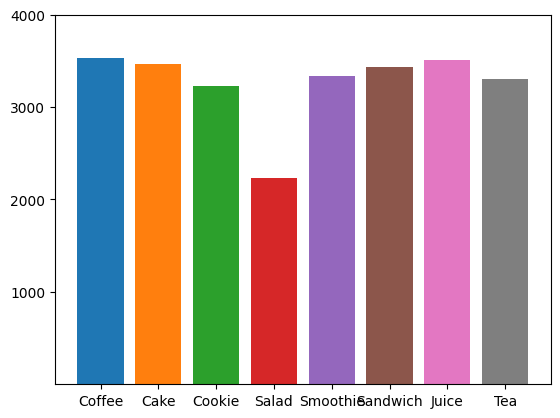

In [28]:
for i in df['Item'].unique().tolist():
  plt.bar(i, df[df['Item']==i]['Quantity'].sum())
# # plt.title("Total Spent By Item")
# # plt.xlabel("ITems")
plt.yticks([1000,2000,3000,4000])
# # plt.ylabel("Total")
plt.show()


In [20]:
df['Item'].value_counts()

,count
Item,
Juice,1168
Coffee,1160
Cake,1138
Sandwich,1127
Smoothie,1094
Cookie,1090
Tea,1088
Salad,898
